# Chest X-Ray Medical Diagnosis with Deep Learning

<a name='1'></a>
## 1. Import Packages and Functions¶



In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# from os import listdir
# from os.path import join, isfile, isdir
# from glob import glob

# from keras.preprocessing.image import ImageDataGenerator
# from keras.applications.densenet import DenseNet121
# from keras.layers import Dense, GlobalAveragePooling2D
# from keras.models import Model
# from keras import backend as K

# from PIL import Image
# sns.set()
# from tqdm import tqdm
# %matplotlib inline

# from keras.models import load_model
# from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# import random

# import cv2
# import matplotlib.pyplot as plt
# import numpy as np
# from keras import backend as K
# from keras.preprocessing import image
# from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
# from tensorflow.compat.v1.logging import INFO, set_verbosity

# random.seed(a=None, version=2)
# #The random.seed() function is a method in Python's random module that initializes the random number generator with a given seed value. 
# #It allows you to generate a sequence of random numbers that can be replicated or reproduced in future runs, as long as the same seed value is used.


# def get_roc_curve(labels, predicted_vals, generator):
#     auc_roc_vals = []
#     optimal_thresholds = []
#     sensitivity = []
#     specificity = []
#     accuracy = []
#     precision = []
#     recall = []
#     f1 = []
#     for i in range(len(labels)):
#         try:
#             gt = generator.labels[:, i] 
#             pred = predicted_vals[:, i]
#             auc_roc = roc_auc_score(gt, pred) # return 
#             auc_roc_vals.append(auc_roc)
#             fpr, tpr, thresholds = roc_curve(gt, pred)
#             optimal_idx = np.argmax(tpr - fpr)
#             optimal_threshold = thresholds[optimal_idx]
#             y_pred = pred > optimal_threshold
#             acc = accuracy_score(gt, y_pred)
#             prec = precision_score(gt, y_pred)
#             rec = recall_score(gt, y_pred)
#             f1_s = f1_score(gt, y_pred)
#             accuracy.append(acc)
#             precision.append(prec)
#             recall.append(rec)
#             f1.append(f1_s)
#             optimal_thresholds.append(optimal_threshold) # find optimal thresholds https://stats.stackexchange.com/questions/123124/how-to-determine-the-optimal-threshold-for-a-classifier-and-generate-roc-curve
#             optimal_tpr = round(tpr[optimal_idx],3)
#             optimal_1_fpr = round(1 - fpr[optimal_idx],3)
# #             print(f"Length of tpr tpr : {len(tpr)} \n Length of thresholds {len(thresholds)}")
# #             print(f"optimal index : {optimal_idx} \n Optimal 1 - fpr : {optimal_1_fpr}")
#             sensitivity.append(optimal_tpr)
#             specificity.append(1-fpr[optimal_idx])
#             plt.figure(1, figsize=(10, 10))
#             plt.plot([0, 1], [0, 1], 'k--') # black dash line
#             plt.plot(fpr, tpr,
#                      label=labels[i] + " (" + str(round(auc_roc, 3)) + ")")
#             plt.xlabel('False positive rate')
#             plt.ylabel('True positive rate')
#             plt.title('ROC curve')
#             plt.legend(loc='best')
#         except:
#             print(
#                 f"Error in generating ROC curve for {labels[i]}. "
#                 f"Dataset lacks enough examples."
#             )
#     plt.show()
#     return auc_roc_vals, optimal_thresholds, sensitivity, specificity, accuracy, precision, recall, f1



<a name='2'></a>
## 2 Load the Datasets

For this assignment, we will be using the ChestX-ray8 dataset (https://arxiv.org/abs/1705.02315) which contains 108,948 frontal-view X-ray images of 32,717 unique patients. 
- Each image in the data set contains multiple text-mined labels identifying 14 different pathological conditions. 
 

In [ ]:
# #test_df = pd.read_csv("../input/nih-chest-xray-dataset/test.csv")
# #test_df.head()
# all_xray_df = pd.read_csv("../input/chestxray8-dataframe/train_df.csv")
# all_xray_df.drop(['No Finding'], axis = 1, inplace = True)
# all_xray_df.head()

# data_dir1 = '../input/data/'
# data_dir2 = '../input/chestxray8-dataframe/'
# train_df = pd.read_csv(data_dir1 + 'Data_Entry_2017.csv')
# image_label_map = pd.read_csv(data_dir2 + 'train_df.csv')
# bad_labels = pd.read_csv(data_dir2 + 'cxr14_bad_labels.csv')

# # Listing all the .jpg filepaths
# image_paths = glob(data_dir1+'images_*/images/*.png')
# print(f'Total image files found : {len(image_paths)}')
# print(f'Total number of image labels: {image_label_map.shape[0]}')
# print(f'Unique patients: {len(train_df["Patient ID"].unique())}')

# image_label_map.drop(['No Finding'], axis = 1, inplace = True)
# labels = image_label_map.columns[2:-1]
# labels


Total image files found : 112120
Total number of image labels: 111863
Unique patients: 30805


Index(['Cardiomegaly', 'Emphysema', 'Effusion', 'Hernia', 'Infiltration',
       'Mass', 'Nodule', 'Atelectasis', 'Pneumothorax', 'Pleural_Thickening',
       'Pneumonia', 'Fibrosis', 'Edema', 'Consolidation'],
      dtype='object')

In [ ]:
# all_xray_df = all_xray_df[89485:] # 22378 images

In [ ]:
# labels = ['Cardiomegaly', 
#           'Emphysema', 
#           'Effusion', 
#           'Hernia', 
#           'Infiltration', 
#           'Mass', 
#           'Nodule', 
#           'Atelectasis',
#           'Pneumothorax',
#           'Pleural_Thickening', 
#           'Pneumonia', 
#           'Fibrosis', 
#           'Edema', 
#           'Consolidation']

<a name='2-3'></a>
## 2.1 Removing Samples with Bad Labels

You oboserve that in main dataset`Data_Entry_2017.csv` contains **112120** rows but in modified dataset `train_df.csv` contains only **111863** images. It turns out some of the images are problematic as discussed in this datasets discussion [thread](https://www.kaggle.com/nih-chest-xrays/data/discussion/55461). They are inverted, not-frontal or somehow badly rotated. Therefore they are removed. So we need to do a little bit of peprocessing here to deal with that matter and we are good to go. 

In [ ]:
# train_df.rename(columns={"Image Index": "Index"}, inplace = True)
# image_label_map.rename(columns={"Image Index": "Index"}, inplace = True)
# train_df = train_df[~train_df.Index.isin(bad_labels.Index)]
# train_df.shape

# Index =[]
# for path in image_paths:
#     Index.append(path.split('/')[5])
# index_path_map = pd.DataFrame({'Index':Index, 'FilePath': image_paths})
# index_path_map.head()

# # Merge the absolute path of the images to the main dataframe
# pd.merge(train_df, index_path_map, on='Index', how='left')

In [ ]:
# pd.merge(train_df, index_path_map, on='Index', how='left')

<a name='2-2'></a>
### 2.2 Preparing Images

1. Normalize the mean and standard deviation of the data
3. Shuffle the input after each epoch.
4. Set the image size to be 320px by 320px

In [ ]:
# IMAGE_SIZE=[256, 256]
# EPOCHS = 20
# # BATCH_SIZE = 8 * strategy.num_replicas_in_sync
# BATCH_SIZE = 64

In [ ]:

# def get_generator(df, image_dir, x_col, y_cols, sample_size=100, batch_size=8, seed=1, target_w = 320, target_h = 320):
    
#     print("getting testing generators...")
    
#     # use sample to fit mean and std for test set generator
#     image_generator = ImageDataGenerator(
#         samplewise_center=True,
#         samplewise_std_normalization= True)
    
#     test_generator = image_generator.flow_from_dataframe(
#             dataframe=df,
#             directory=image_dir,
#             x_col=x_col,
#             y_col=y_cols,
#             class_mode="raw",
#             batch_size=batch_size,
#             shuffle=False,
#             seed=seed,
#             target_size=(target_w,target_h))
    
#     return test_generator

# train_generator = get_generator(df = image_label_map,
#                                       image_dir = None, 
#                                       x_col = "FilePath",
#                                       y_cols = labels, 
#                                       batch_size=BATCH_SIZE,
#                                       target_w = IMAGE_SIZE[0], 
#                                       target_h = IMAGE_SIZE[1] 
#                                       )

With our generator function ready, let's make one generator for our training data and one each of our test and  validation datasets.

In [ ]:
# import os
# image_label_map['FilePath'] = image_label_map['FilePath'].apply(
#     lambda x: os.path.abspath(x)
# )


In [ ]:
# print(image_label_map.columns)


In [ ]:
# print(image_label_map['FilePath'].iloc[0])


In [ ]:
# IMAGE_DIR = ""
# test_generator= get_generator(all_xray_df, "", "FilePath", labels)

<a name='2-6'></a>
### 2.4 Look at the X-rays
Now lets have a look at the original dataset. Here `get_label()` function returns the concatenated version of the names of the diagnosis categories. You can run the following cell multiple times to get more images. 

In [ ]:
# X, Y = train_generator.next()

# def get_label(y):

#     ret_labels = []
#     for idx in range(len(y)):
#         if y[idx]: ret_labels.append(labels[idx])
#     if len(ret_labels):  return '|'.join(ret_labels)
#     else: return 'No Label'

# rows = int(np.floor(np.sqrt(X.shape[0])))
# cols = int(X.shape[0]//rows)
# fig = plt.figure(figsize=(20,15))
# for i in range(1, rows*cols+1):
#     fig.add_subplot(rows, cols, i)
#     plt.imshow(X[i-1], cmap='gray')
#     plt.title(get_label(Y[i-1]))
#     plt.axis(False)
#     fig.add_subplot

In [ ]:
# # peek into one item of the test generator
# x, y = test_generator.__getitem__(0)
# plt.imshow(x[0]);

<a name='2-7'></a>
### 2.5 Diagnosis Distribution (Normal vs Sick)
Now lets have a look at the distribution of the dataset. It is quire evident that almost half of the images didn't have any problem. They are simply the x-rays of healthy people marked as **No Finding** in the data frame. However we can have a look at the number of healthy and non-healthy x-rays.  

In [ ]:
# import bokeh
# import IPython.display as ipd
# from bokeh.layouts import column, row
# from bokeh.models import ColumnDataSource, LinearAxis, Range1d
# from bokeh.models.tools import HoverTool
# from bokeh.palettes import BuGn4, cividis
# from bokeh.plotting import figure, output_notebook, show, output_file
# from bokeh.transform import cumsum
# from bokeh.palettes import Category20b

# output_notebook()
# diagnosis = ['Normal', 'Sick' ]
# counts = [(train_df['Finding Labels'] == 'No Finding').sum(), train_df.shape[0]- (train_df['Finding Labels'] == 'No Finding').sum()]
# source = ColumnDataSource(pd.DataFrame({'Type':diagnosis,'Counts':counts, 'color':['#054000', '#e22d00']}))

# tooltips = [
#     ("Category", "@Type"),
#     ("No of Samples", "@Counts")
# ]

# normal_vs_sick = figure(x_range=diagnosis, y_range=(0,70000), plot_height=400, plot_width = 400, title="Normal vs Sick Distribution", tooltips = tooltips)
# normal_vs_sick.vbar(x='Type', top='Counts', width=0.75, legend_field="Type", color = 'color', source=source)
# normal_vs_sick.xgrid.grid_line_color = None
# normal_vs_sick.legend.orientation = "vertical"
# normal_vs_sick.legend.location = "top_right"
# show(normal_vs_sick)




<a name='2-8'></a>
### 2.8 Diagnosis Distribution
Now lets have a look at the distribution of the dataset. It is quire evident that almost half of the images didn't have any problem. They are simply the x-rays of healthy people marked as **No Finding** in the data frame. However we can have a look at the number of healthy and non-healthy x-rays.  

In [ ]:
# data = image_label_map[labels].sum(axis=0).sort_values(ascending = True)

# # bokeh packages

# diagnosis = data.index.tolist()
# source = ColumnDataSource(data=dict(diagnosis=data.index.tolist(), counts=data.tolist(), color = Category20b[len(data)]))

# tooltips = [("Diagnosis", "@diagnosis"), ("Count", "@counts") ]
# diag_dist = figure(x_range=diagnosis, y_range=(0,15000), plot_height=400, plot_width = 700, title="Diagnosis Distributions", tooltips = tooltips)
# diag_dist.vbar(x='diagnosis', top='counts', width=0.65, color='color', legend_field="diagnosis", source=source)

# diag_dist.xgrid.grid_line_color = None
# diag_dist.legend.orientation = "vertical"
# diag_dist.legend.location = "top_left"

# # show(diag_dist)




# def plot_pie_bokeh(data = None):
#     from math import pi
#     from bokeh.palettes import Category20c
#     x = data.to_dict()

#     data = pd.Series(x).reset_index(name='value').rename(columns={'index':'category'})
#     data['angle'] = data['value']/data['value'].sum() * 2*pi
#     data['color'] = Category20b[len(x)]
#     p = figure(plot_height=400, plot_width = 700, title="Pie Chart", tooltips="@category: @value%", x_range=(-0.5, 1.0))
#     p.wedge(x=0.38, y=1, radius=0.4, start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
#             line_color="black", fill_color='color', legend_field='category', source=data)

#     p.axis.axis_label=None
#     p.axis.visible=False
#     p.grid.grid_line_color = None

#     p.legend.orientation = "vertical"
#     p.legend.location = "top_left"
    
#     return p


# dist_diag_percent = plot_pie_bokeh(data/data.sum()*100)

# show(column(diag_dist, dist_diag_percent))

We observe that among the different identified conditions, **Infiltration, Effusion and Atelectasis** have the highest dominance and **Hernia** has the lowest prevalance. Hernia is very small **(0.28% only)** among the sick patients. However the hightest prevalance **Infiltration** has only **25%** and rest of the 13 classses combines to the rest. So the dataset has highly imbalanced positive class which will in turn create problem of negative bias while training CNN models. 

In [ ]:
# show(plot_pie_bokeh(data/data.sum()*100))

<a name='2-9'></a>
### 2.9 Age Histogram Distribution
Looking at the dataframe from the metadata, I found something interesting.  At first try, when I wanted to draw the histogram using `np.histogram`, I was getting unusually high range. Then I had a look at the metadata checking the Patient Age has some unusually high numbers. Just checked the patients with age greater than 100 and found out several patients samples where age is listed 140+ year to even 450 years :P :P :P Then I replaced those values with mean of the rest of the dataset which are less than 100 years old because they are simply data entry error. 

In [ ]:
# train_df.rename(columns={"Patient Age": "PatientAge"}, inplace = True)
# train_df[train_df['PatientAge'] > 100]

In [ ]:
# average_age = int(train_df[train_df['PatientAge'] < 100]['PatientAge'].mean())
# for idx in range(train_df.shape[0]):
#     if train_df.iloc[idx, 4] > 100:
#         print(f'{train_df.iloc[idx, 0]} : age {train_df.iloc[idx, 4]} is changed to ->> {average_age}')
#         train_df.iloc[idx, 4] = average_age

# train_df[train_df['PatientAge'] > 100]

In [ ]:
# def hist_hover(data, column=None,  title = 'Histogram',  colors=["SteelBlue", "Tan"], bins=30, log_scale=False, show_plot=True):

#     # build histogram data with Numpy
#     hist, edges = np.histogram(data, bins = bins)

#     hist_df = pd.DataFrame({column: hist, "left": edges[:-1], "right": edges[1:]})
#     hist_df["interval"] = ["%d to %d" % (left, right) for left, 
#                            right in zip(hist_df["left"], hist_df["right"])]

#     # bokeh histogram with hover tool
#     if log_scale == True:
#         hist_df["log"] = np.log(hist_df[column])
#         src = ColumnDataSource(hist_df)
#         plot = figure(plot_height = 300, plot_width = 600,
#               title = title,
#               x_axis_label = column.capitalize(),
#               y_axis_label = "Log Count")    
#         plot.quad(bottom = 0, top = "log",left = "left", 
#             right = "right", source = src, fill_color = colors[0], 
#             line_color = "black", fill_alpha = 0.7,
#             hover_fill_alpha = 1.0, hover_fill_color = colors[1])
#     else:
#         src = ColumnDataSource(hist_df)
#         plot = figure(plot_height = 300, plot_width = 600,
#             title = title,
#               x_axis_label = column.capitalize(),
#               y_axis_label = "Count")    
#         plot.quad(bottom = 0, top = column,left = "left", 
#             right = "right", source = src, fill_color = colors[0], 
#             line_color = "black", fill_alpha = 0.7,
#             hover_fill_alpha = 1.0, hover_fill_color = colors[1])
#     # hover tool
#     hover = HoverTool(tooltips = [(' Age Interval', '@interval'),
#                               ('Sample Count', str("@" +str(column)))])
#     plot.add_tools(hover)
#     # output
#     if show_plot == True:
#         show(plot)
#     else:
#         return plot

In [ ]:
# hist_hover(train_df['PatientAge'], column = 'PatientAge', bins = 100)

In [ ]:
# ages_male = train_df.loc[(train_df["Patient Gender"] == 'M'), "PatientAge"].tolist()
# ages_female = train_df.loc[(train_df["Patient Gender"] == 'F'), "PatientAge"].tolist()

In [ ]:
# show(column(hist_hover(ages_male, column = 'MaleAges', title = 'Male Patients Age Histogram', bins = 95, show_plot=False),
#             hist_hover(ages_female, column = 'FemaleAges', title = 'Female Patients Age Histogram',  bins = 95, show_plot=False)))

In [ ]:
# train_df.PatientAge.max() - train_df.PatientAge.min()

<a name='3'></a>
## 3 Model Development

Now we'll move on to model training and development. We have a few practical challenges to deal with before actually training a neural network, though. The first is class imbalance.

Now let's test our function with some simple cases. 

<a name='3-3'></a>
### 3.1 DenseNet121

Next, we will use a pre-trained [DenseNet121](https://www.kaggle.com/pytorch/densenet121) model which we can load directly from Keras and then add two layers on top of it:
1. A `GlobalAveragePooling2D` layer to get the average of the last convolution layers from DenseNet121.
2. A `Dense` layer with `sigmoid` activation to get the prediction logits for each of our classes.

We can set our custom loss function for the model by specifying the `loss` parameter in the `compile()` function.

In [ ]:
# # create the base pre-trained model
# base_model = DenseNet121(weights='../input/chestxray8-dataframe/densenet.hdf5', include_top=False)

# x = base_model.output

# # add a global spatial average pooling layer
# x = GlobalAveragePooling2D()(x)

# # and a logistic layer
# predictions = Dense(len(labels), activation="sigmoid")(x)

# model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
# model.load_weights("../input/chestxray8-dataframe/pretrained_model.h5")

<a name='4'></a>
## 4 Prediction and Evaluation

In [ ]:
# predicted_vals=model.predict(test_generator, steps = len(test_generator), verbose = 1)

In [ ]:
# # get roc curve
# from statistics import mean
# auc_rocs, thresholds, sensitivity, specificity, accuracy, precision, recall, f1 = get_roc_curve(labels, predicted_vals, test_generator)


In [ ]:

# from tabulate import tabulate
# table = zip(labels, auc_rocs)
# print(f"Mean AUC : {mean(auc_rocs)}")
# print(tabulate(table, headers = ['Pathology', 'AUC'], tablefmt = 'fancy_grid'))

In [ ]:
# from tabulate import tabulate
# table = zip(labels, auc_rocs, thresholds, sensitivity, specificity, accuracy, precision, recall, f1)
# print(tabulate(table, headers = ['Pathology', 'AUC', 'Threshold Value', 'Sensitivity', 'Specificity', 'Accuracy', 'Precision', 'Recall', 'F1 Score'], tablefmt = 'fancy_grid'))

In [ ]:
# print(predicted_vals[0:100])


In [7]:
# Multimodal NIH Chest X-ray Classification (FINAL FIXED)
# Image + Metadata (Age, Gender, View)
# =========================================================

import os, math, json, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from glob import glob

from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from tabulate import tabulate

import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

# ===================== PATHS & PARAMS =====================
DATA_DIR1 = "../input/data/"
DATA_DIR2 = "../input/chestxray8-dataframe/"

IMAGE_SIZE = (256, 256)
BATCH_SIZE = 8

EPOCHS_PHASE_A = 20
EPOCHS_PHASE_B = 15

UNFREEZE_LAST_N = 40
RANDOM_SEED = 42

In [8]:
LABELS = [
    'Cardiomegaly','Emphysema','Effusion','Hernia','Infiltration','Mass',
    'Nodule','Atelectasis','Pneumothorax','Pleural_Thickening',
    'Pneumonia','Fibrosis','Edema','Consolidation'
]

# ===================== LOAD CSV FILES =====================
train_df = pd.read_csv(DATA_DIR1 + "Data_Entry_2017.csv")
image_label_map = pd.read_csv(DATA_DIR2 + "train_df.csv")
bad_labels = pd.read_csv(DATA_DIR2 + "cxr14_bad_labels.csv")

if 'No Finding' in image_label_map.columns:
    image_label_map.drop(['No Finding'], axis=1, inplace=True)

train_df.rename(columns={'Image Index':'Index'}, inplace=True)
image_label_map.rename(columns={'Image Index':'Index'}, inplace=True)





In [ ]:
# ===================== IMAGE PATH MAPPING =====================
image_paths = glob(DATA_DIR1 + "images_*/images/*.png")
index_path_map = pd.DataFrame({
    'Index': [os.path.basename(p) for p in image_paths],
    'FilePath': image_paths
})

# ===================== MERGE DATA =====================
image_label_map = image_label_map.merge(index_path_map, on='Index', how='left')
train_df = train_df[~train_df.Index.isin(bad_labels.Index)]

df_full = image_label_map.merge(
    train_df[['Index','Patient ID','Patient Age','Patient Gender','View Position']],
    on='Index',
    how='left'
)

# ===================== FIX DUPLICATES =====================
# ---------- SAFE FIX FOR FilePath ----------
if 'FilePath_x' in df_full.columns and 'FilePath_y' in df_full.columns:
    df_full['FilePath'] = df_full['FilePath_x']
    df_full.loc[df_full['FilePath'].isna(), 'FilePath'] = df_full['FilePath_y']
    df_full.drop(columns=['FilePath_x', 'FilePath_y'], inplace=True)

elif 'FilePath_x' in df_full.columns:
    df_full.rename(columns={'FilePath_x': 'FilePath'}, inplace=True)

elif 'FilePath_y' in df_full.columns:
    df_full.rename(columns={'FilePath_y': 'FilePath'}, inplace=True)



# ---------- SAFE FIX FOR Patient ID ----------
if 'Patient ID_x' in df_full.columns and 'Patient ID_y' in df_full.columns:
    df_full['Patient ID'] = df_full['Patient ID_x']
    df_full.loc[df_full['Patient ID'].isna(), 'Patient ID'] = df_full['Patient ID_y']
    df_full.drop(columns=['Patient ID_x', 'Patient ID_y'], inplace=True)

elif 'Patient ID_x' in df_full.columns:
    df_full.rename(columns={'Patient ID_x': 'Patient ID'}, inplace=True)

elif 'Patient ID_y' in df_full.columns:
    df_full.rename(columns={'Patient ID_y': 'Patient ID'}, inplace=True)

df_full.columns = df_full.columns.str.strip()
df_full = df_full.dropna(subset=['FilePath']).reset_index(drop=True)

print("Merged df shape:", df_full.shape)

# ===================== METADATA PROCESSING =====================
def parse_age(x):
    try:
        return int(str(x).replace('Y',''))
    except:
        return np.nan

df_full['age_years'] = df_full['Patient Age'].apply(parse_age)
df_full['age_years'].fillna(df_full['age_years'].median(), inplace=True)
df_full['age_norm'] = df_full['age_years'] / 100.0

df_full['sex_bin'] = df_full['Patient Gender'].map(lambda x: 1 if x=='M' else 0)

def parse_view(v):
    if pd.isna(v): return 'UNK'
    if 'AP' in v: return 'AP'
    if 'PA' in v: return 'PA'
    return 'UNK'

df_full['view_cat'] = df_full['View Position'].apply(parse_view)
view_dummies = pd.get_dummies(df_full['view_cat'], prefix='view')
df_full = pd.concat([df_full, view_dummies], axis=1)

META_COLS = ['age_norm','sex_bin'] + [c for c in df_full.columns if c.startswith('view_') and c!='view_cat']
print("META_COLS:", META_COLS)

# ===================== PATIENT-LEVEL SPLIT =====================
df_full['PatientID_fill'] = df_full['Patient ID'].fillna(df_full['Index']).astype(str)

gss = GroupShuffleSplit(n_splits=1, train_size=0.8, random_state=RANDOM_SEED)
train_idx, temp_idx = next(gss.split(df_full, groups=df_full['PatientID_fill']))
temp = df_full.iloc[temp_idx]

gss2 = GroupShuffleSplit(n_splits=1, train_size=0.5, random_state=RANDOM_SEED)
val_idx, test_idx = next(gss2.split(temp, groups=temp['PatientID_fill']))

train_df = df_full.iloc[train_idx]
val_df = temp.iloc[val_idx]
test_df = temp.iloc[test_idx]

print("Train / Val / Test:", len(train_df), len(val_df), len(test_df))

Merged df shape: (111863, 20)
META_COLS: ['age_norm', 'sex_bin', 'view_AP', 'view_PA']
Train / Val / Test: 89427 10929 11507


In [10]:
x, y = next(iter(train_ds))
print(type(x), len(x))
print(x[0].shape)  # images
print(x[1].shape)  # metadata


NameError: name 'train_ds' is not defined

In [11]:
# ===================== TF.DATA PIPELINE (GPU FRIENDLY) =====================
def load_image_tf(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, IMAGE_SIZE)
    img = preprocess_input(img)
    return img

def make_tf_dataset(df, shuffle=True):
    paths = df['FilePath'].values
    meta = df[META_COLS].values.astype(np.float32)
    labels = df[LABELS].values.astype(np.float32)

    ds = tf.data.Dataset.from_tensor_slices((paths, meta, labels))

    if shuffle:
        ds = ds.shuffle(2048, seed=RANDOM_SEED)

    def _map(p, m, y):
        return (load_image_tf(p), m), y

    ds = ds.map(_map, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(tf.data.AUTOTUNE)

    return ds

train_ds = make_tf_dataset(train_df, shuffle=True)
val_ds   = make_tf_dataset(val_df, shuffle=False)
test_ds  = make_tf_dataset(test_df, shuffle=False)


In [12]:
import h5py
fpath = '/kaggle/input/chestxray8-dataframe/pretrained_model.h5'
with h5py.File(fpath, 'r') as f:
    print("Top-level keys:", list(f.keys()))
    if 'model_weights' in f:
        print("model_weights keys:", list(f['model_weights'].keys())[:50])
    if 'layer_names' in f.attrs:
        print('layer_names attr present')


Top-level keys: ['bn', 'conv1', 'conv2_block1_0_bn', 'conv2_block1_0_relu', 'conv2_block1_1_bn', 'conv2_block1_1_conv', 'conv2_block1_1_relu', 'conv2_block1_2_conv', 'conv2_block1_concat', 'conv2_block2_0_bn', 'conv2_block2_0_relu', 'conv2_block2_1_bn', 'conv2_block2_1_conv', 'conv2_block2_1_relu', 'conv2_block2_2_conv', 'conv2_block2_concat', 'conv2_block3_0_bn', 'conv2_block3_0_relu', 'conv2_block3_1_bn', 'conv2_block3_1_conv', 'conv2_block3_1_relu', 'conv2_block3_2_conv', 'conv2_block3_concat', 'conv2_block4_0_bn', 'conv2_block4_0_relu', 'conv2_block4_1_bn', 'conv2_block4_1_conv', 'conv2_block4_1_relu', 'conv2_block4_2_conv', 'conv2_block4_concat', 'conv2_block5_0_bn', 'conv2_block5_0_relu', 'conv2_block5_1_bn', 'conv2_block5_1_conv', 'conv2_block5_1_relu', 'conv2_block5_2_conv', 'conv2_block5_concat', 'conv2_block6_0_bn', 'conv2_block6_0_relu', 'conv2_block6_1_bn', 'conv2_block6_1_conv', 'conv2_block6_1_relu', 'conv2_block6_2_conv', 'conv2_block6_concat', 'conv3_block10_0_bn', 'con

In [13]:
x, y = next(iter(train_ds))
print(type(x), len(x))
print(x[0].shape)  # images
print(x[1].shape)  # metadata


<class 'tuple'> 2
(8, 256, 256, 3)
(8, 4)


In [ ]:
# ===================== MODEL =====================
backbone = DenseNet121(
    weights=None,                 # IMPORTANT
    include_top=False,
    input_shape=(*IMAGE_SIZE, 3)
)

backbone.load_weights(
    '/kaggle/input/chestxray8-dataframe/pretrained_model.h5',
    by_name=True,
    skip_mismatch=True
)

x = layers.GlobalAveragePooling2D()(backbone.output)

meta_input = layers.Input(shape=(len(META_COLS),))
m = layers.Dense(64, activation='relu')(meta_input)
m = layers.Dense(32, activation='relu')(m)

fusion = layers.Concatenate()([x,m])
h = layers.Dense(512, activation='relu')(fusion)
h = layers.Dropout(0.5)(h)
out = layers.Dense(len(LABELS), activation='sigmoid')(h)

model = Model([backbone.input, meta_input], out)
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# ===================== PHASE A: train head only =====================

# Freeze backbone
for l in backbone.layers:
    l.trainable = False

# Callbacks for Phase A
ckpt_phase_a = ModelCheckpoint(
    filepath="ckpt_phaseA_best.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

early_phase_a = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1
)

model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_PHASE_A,
    callbacks=[ckpt_phase_a, early_phase_a]
)


# ===================== PHASE B: fine-tune last N layers =====================

# Unfreeze last N backbone layers
for l in backbone.layers[-UNFREEZE_LAST_N:]:
    l.trainable = True

# Recompile with low learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="binary_crossentropy"
)

# Callbacks for Phase B
ckpt_phase_b = ModelCheckpoint(
    filepath="ckpt_phaseB_best.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

early_phase_b = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1
)

model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS_PHASE_B,
    callbacks=[ckpt_phase_b, early_phase_b]
)


In [ ]:
# ===================== EVALUATION =====================
preds = np.vstack([model.predict(x, verbose=0) for x,_ in test_ds])
y_true = np.vstack([y for _,y in test_ds])

aucs = [roc_auc_score(y_true[:,i], preds[:,i]) for i in range(len(LABELS))]
print("Mean AUC:", np.mean(aucs))
print(tabulate(zip(LABELS, aucs), headers=['Pathology','AUC'], tablefmt='fancy_grid'))

In [ ]:
# ===================== SAVE =====================
model.save("/kaggle/working/multimodal_nih_model")
with open("/kaggle/working/model_schema.json","w") as f:
    json.dump({"labels":LABELS,"meta_cols":META_COLS}, f)

print("Model & schema saved successfully")


In [5]:
import os
import shutil

SRC = "/kaggle/input/chestxraymultimodal/tensorflow2/default/1"
DST = "/kaggle/working/fixed_saved_model"

os.makedirs(os.path.join(DST, "variables"), exist_ok=True)

# copy saved_model.pb
shutil.copy(
    os.path.join(SRC, "saved_model.pb"),
    os.path.join(DST, "saved_model.pb")
)

# move variables into proper folder
shutil.copy(
    os.path.join(SRC, "variables.index"),
    os.path.join(DST, "variables", "variables.index")
)

shutil.copy(
    os.path.join(SRC, "variables.data-00000-of-00001"),
    os.path.join(DST, "variables", "variables.data-00000-of-00001")
)

print("Fixed SavedModel structure created at:", DST)

Fixed SavedModel structure created at: /kaggle/working/fixed_saved_model


Loading SavedModel from: /kaggle/working/fixed_saved_model
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_10 (ZeroPadding2 (None, 262, 262, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d_10[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
_________________________________

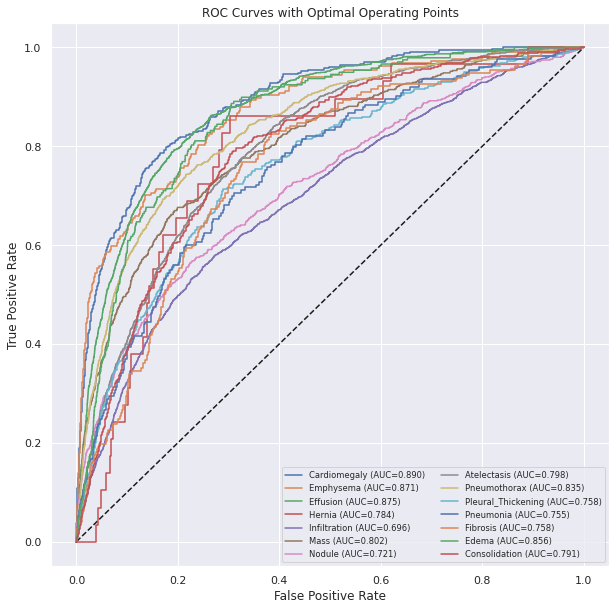


PER-CLASS RESULTS
╒════╤════════════════════╤═══════════╤════════════════╤═════════════╤══════════╤═══════════╤═══════════════╤══════╤══════╤══════╤══════╤════════════════════╕
│    │ Pathology          │   AUC_ROC │   AvgPrecision │   Precision │   Recall │        F1 │   Specificity │   TP │   FP │   FN │   TN │   OptimalThreshold │
╞════╪════════════════════╪═══════════╪════════════════╪═════════════╪══════════╪═══════════╪═══════════════╪══════╪══════╪══════╪══════╪════════════════════╡
│  0 │ Cardiomegaly       │  0.890129 │     0.301684   │  0.124464   │ 0.786145 │ 0.214903  │      0.835705 │  261 │ 1836 │   71 │ 9339 │         0.044667   │
├────┼────────────────────┼───────────┼────────────────┼─────────────┼──────────┼───────────┼───────────────┼──────┼──────┼──────┼──────┼────────────────────┤
│  1 │ Emphysema          │  0.870801 │     0.252532   │  0.0904762  │ 0.700461 │ 0.160253  │      0.864659 │  152 │ 1528 │   65 │ 9762 │         0.0575547  │
├────┼────────────────────┼

In [14]:
# ===================== CONFIG =====================
MODEL_DIR = "/kaggle/working/fixed_saved_model"
OUT_DIR = "eval_outputs"
os.makedirs(OUT_DIR, exist_ok=True)

IMAGE_SIZE = (256, 256)
BATCH_SIZE = 8

LABELS = [
    "Cardiomegaly", "Emphysema", "Effusion", "Hernia",
    "Infiltration", "Mass", "Nodule", "Atelectasis",
    "Pneumothorax", "Pleural_Thickening", "Pneumonia",
    "Fibrosis", "Edema", "Consolidation"
]

# ===================== IMPORTS =====================
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    precision_score, recall_score, f1_score,
    confusion_matrix
)
from tensorflow.keras.applications.densenet import preprocess_input
from tabulate import tabulate

# ===================== LOAD MODEL =====================
print("Loading SavedModel from:", MODEL_DIR)
model = tf.keras.models.load_model(MODEL_DIR, compile=False)
model.summary()

assert len(model.inputs) == 2, "Model is not multimodal (expected image + meta)"

# ===================== PREPROCESSING =====================
def load_image_tf(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, IMAGE_SIZE)
    img = preprocess_input(img)   # MUST match training
    return img

def make_tf_dataset(df, shuffle=False):
    paths = df["FilePath"].values
    meta  = df[META_COLS].values.astype(np.float32)
    labels = df[LABELS].values.astype(np.float32)

    ds = tf.data.Dataset.from_tensor_slices((paths, meta, labels))

    def _map(p, m, y):
        return (load_image_tf(p), m), y

    ds = ds.map(_map, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds

test_ds = make_tf_dataset(test_df, shuffle=False)

# ===================== PREDICTION =====================
print("Running inference...")
preds = model.predict(test_ds, verbose=1)

from sklearn.metrics import (
    roc_auc_score, roc_curve,
    accuracy_score, precision_score,
    recall_score, f1_score
)
import matplotlib.pyplot as plt
import numpy as np

def get_roc_curve_tfdata(labels, y_true, y_pred):
    auc_roc_vals = []
    optimal_thresholds = []
    sensitivity = []
    specificity = []
    accuracy = []
    precision = []
    recall = []
    f1 = []

    plt.figure(figsize=(10, 10))
    plt.plot([0, 1], [0, 1], 'k--')

    for i, label in enumerate(labels):
        gt = y_true[:, i]
        pred = y_pred[:, i]

        # Skip classes with no positives
        if gt.sum() == 0:
            print(f"Skipping {label} (no positive samples)")
            continue

        auc = roc_auc_score(gt, pred)
        auc_roc_vals.append(auc)

        fpr, tpr, thresholds = roc_curve(gt, pred)

        # Youden's J statistic
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = thresholds[optimal_idx]

        y_bin = (pred >= optimal_threshold).astype(int)

        acc = accuracy_score(gt, y_bin)
        prec = precision_score(gt, y_bin, zero_division=0)
        rec = recall_score(gt, y_bin, zero_division=0)
        f1_s = f1_score(gt, y_bin, zero_division=0)

        sensitivity.append(tpr[optimal_idx])
        specificity.append(1 - fpr[optimal_idx])
        accuracy.append(acc)
        precision.append(prec)
        recall.append(rec)
        f1.append(f1_s)
        optimal_thresholds.append(optimal_threshold)

        plt.plot(
            fpr, tpr,
            label=f"{label} (AUC={auc:.3f})"
        )

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves with Optimal Operating Points")
    plt.legend(loc="lower right", fontsize="small", ncol=2)
    plt.show()

    return {
        "AUC": auc_roc_vals,
        "Optimal Thresholds": optimal_thresholds,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1
    }


y_true = np.vstack([y for _, y in test_ds])

roc_metrics = get_roc_curve_tfdata(
    labels=LABELS,
    y_true=y_true,
    y_pred=preds
)

# ===================== METRICS (CORRECTED) =====================
results = []

optimal_thresholds = roc_metrics["Optimal Thresholds"]

for i, label in enumerate(LABELS):
    y_t = y_true[:, i]
    y_p = preds[:, i]

    auc = roc_auc_score(y_t, y_p)
    ap  = average_precision_score(y_t, y_p)

    # USE OPTIMAL THRESHOLD
    y_bin = (y_p >= optimal_thresholds[i]).astype(int)

    precision = precision_score(y_t, y_bin, zero_division=0)
    recall    = recall_score(y_t, y_bin, zero_division=0)
    f1        = f1_score(y_t, y_bin, zero_division=0)

    tn, fp, fn, tp = confusion_matrix(y_t, y_bin).ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    results.append([
        label, auc, ap, precision, recall, f1, specificity, tp, fp, fn, tn,
        optimal_thresholds[i]
    ])

df = pd.DataFrame(
    results,
    columns=[
        "Pathology", "AUC_ROC", "AvgPrecision",
        "Precision", "Recall", "F1",
        "Specificity", "TP", "FP", "FN", "TN",
        "OptimalThreshold"
    ]
)


# ===================== GLOBAL METRICS =====================
mean_auc = df["AUC_ROC"].mean()
mean_ap  = df["AvgPrecision"].mean()

print("\nPER-CLASS RESULTS")
print(tabulate(df, headers="keys", tablefmt="fancy_grid"))

print("\nGLOBAL SUMMARY")
print("Mean AUC:", mean_auc)
print("Mean AP :", mean_ap)

# ===================== SAVE FOR PATENT =====================
with open(os.path.join(OUT_DIR, "summary.txt"), "w") as f:
    f.write(tabulate(df, headers="keys", tablefmt="grid"))
    f.write(f"\n\nMean AUC: {mean_auc:.4f}")
    f.write(f"\nMean AP : {mean_ap:.4f}")

print("\nEvaluation complete. Outputs saved to:", OUT_DIR)


In [ ]:
from sklearn.metrics import (
    roc_auc_score, roc_curve,
    accuracy_score, precision_score,
    recall_score, f1_score
)
import matplotlib.pyplot as plt
import numpy as np

def get_roc_curve_tfdata(labels, y_true, y_pred):
    auc_roc_vals = []
    optimal_thresholds = []
    sensitivity = []
    specificity = []
    accuracy = []
    precision = []
    recall = []
    f1 = []

    plt.figure(figsize=(10, 10))
    plt.plot([0, 1], [0, 1], 'k--')

    for i, label in enumerate(labels):
        gt = y_true[:, i]
        pred = y_pred[:, i]

        # Skip classes with no positives
        if gt.sum() == 0:
            print(f"Skipping {label} (no positive samples)")
            continue

        auc = roc_auc_score(gt, pred)
        auc_roc_vals.append(auc)

        fpr, tpr, thresholds = roc_curve(gt, pred)

        # Youden's J statistic
        optimal_idx = np.argmax(tpr - fpr)
        optimal_threshold = thresholds[optimal_idx]

        y_bin = (pred >= optimal_threshold).astype(int)

        acc = accuracy_score(gt, y_bin)
        prec = precision_score(gt, y_bin, zero_division=0)
        rec = recall_score(gt, y_bin, zero_division=0)
        f1_s = f1_score(gt, y_bin, zero_division=0)

        sensitivity.append(tpr[optimal_idx])
        specificity.append(1 - fpr[optimal_idx])
        accuracy.append(acc)
        precision.append(prec)
        recall.append(rec)
        f1.append(f1_s)
        optimal_thresholds.append(optimal_threshold)

        plt.plot(
            fpr, tpr,
            label=f"{label} (AUC={auc:.3f})"
        )

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves with Optimal Operating Points")
    plt.legend(loc="lower right", fontsize="small", ncol=2)
    plt.show()

    return {
        "AUC": auc_roc_vals,
        "Optimal Thresholds": optimal_thresholds,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1
    }


In [ ]:
import os, json, cv2, numpy as np, tensorflow as tf
from tensorflow.keras.applications.densenet import preprocess_input


In [ ]:
IMAGE_SIZE = (256, 256)

def prepare_inputs_from_row(row, meta_cols):
    # IMAGE
    img = tf.io.read_file(row['FilePath'])
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, IMAGE_SIZE)
    img = preprocess_input(tf.cast(img, tf.float32))
    img_batch = tf.expand_dims(img, axis=0)  # (1,H,W,3)

    # METADATA (CRITICAL FIX)
    meta_vector = row[meta_cols].values.astype(np.float32)
    meta_batch = tf.expand_dims(meta_vector, axis=0)  # (1,4)

    return img_batch, meta_batch


In [ ]:
def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found")

def make_gradcam_heatmap(model, img_batch, meta_batch, class_index):
    last_conv = find_last_conv_layer(model)

    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_out, preds = grad_model([img_batch, meta_batch])
        loss = preds[:, class_index]

    grads = tape.gradient(loss, conv_out)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_out = conv_out[0]

    heatmap = tf.reduce_sum(conv_out * pooled_grads, axis=-1)
    heatmap = tf.nn.relu(heatmap)
    heatmap /= tf.reduce_max(heatmap) + 1e-8

    heatmap = cv2.resize(heatmap.numpy(), IMAGE_SIZE)
    return heatmap



In [ ]:
def overlay_gradcam(image_path, heatmap, alpha=0.4):
    orig = cv2.imread(image_path)
    orig = cv2.resize(orig, IMAGE_SIZE)

    heatmap_uint8 = np.uint8(255 * heatmap)
    heatmap_color = cv2.applyColorMap(heatmap_uint8, cv2.COLORMAP_JET)

    overlay = cv2.addWeighted(orig, 1 - alpha, heatmap_color, alpha, 0)
    return orig, overlay


In [ ]:
def run_patient_inference(
    model, row, meta_cols, labels,
    out_dir="patient_outputs", top_k=3
):
    os.makedirs(out_dir, exist_ok=True)

    # Prepare inputs
    img_batch, meta_batch = prepare_inputs_from_row(row, meta_cols)

    # Predict
    probs = model.predict([img_batch, meta_batch])[0]
    prob_dict = {labels[i]: float(probs[i]) for i in range(len(labels))}


    # Pick top class for Grad-CAM
    top_idx = np.argsort(probs)[::-1][:top_k][0]
    heatmap = make_gradcam_heatmap(model, img_batch, meta_batch, top_idx)

    # Overlay
    orig, overlay = overlay_gradcam(row['FilePath'], heatmap)

    pid = str(row.get("Patient ID", "unknown"))
    pdir = os.path.join(out_dir, pid)
    os.makedirs(pdir, exist_ok=True)

    # Save files
    cv2.imwrite(os.path.join(pdir, "original.png"), orig)
    cv2.imwrite(os.path.join(pdir, "gradcam.png"), overlay)

    with open(os.path.join(pdir, "info.txt"), "w") as f:
        json.dump({
            "patient_id": pid,
            "metadata": {k: float(v) for k, v in row[meta_cols].to_dict().items()},
            "probabilities": prob_dict
        }, f, indent=2)

    print(f"Saved outputs to {pdir}")
    return prob_dict


In [ ]:
idx = 11506  # pick any test_df index
row = test_df.iloc[idx]

probs = run_patient_inference(
    model=model,
    row=row,
    meta_cols=['age_norm', 'sex_bin', 'view_AP', 'view_PA'],
    labels=LABELS,
    out_dir="patient_outputs"
)

print(probs)


In [ ]:
test_df.head